# Лекция и практика 7

### <font color="navy">Знакомство с пакетами обработки и визуализации данных на python</font>

<b>Pandas</b> -- это библиотека для обработки и анализа структурированных данных, её название происходит от «panel data» («панельные данные»). Панельными данными называют информацию, структурированную в виде таблиц. Для работы с такими массивами данных и создана эта библиотека.

<b>Основные понятия для работы с этой библиотекой:</b>

<b>Pandas Series </b> -- это одномерный проиндексированный (пронумерованный, промаркерованный) список: у каждого элемента есть свой индекс, по которому осуществляется доступ к элементу.

In [6]:
import pandas as pd #импортируем библиотеку
import math

#создадим серии
series_a = pd.Series([1, 10, 34, math.pi, "good"])
print("тип объекта:", type(series_a))
print('\nсерия:\n',series_a)
print('\nдоступ по индексу сразу к нескольким элементам:\n', series_a[[1,3]])

тип объекта: <class 'pandas.core.series.Series'>

серия:
 0           1
1          10
2          34
3    3.141593
4        good
dtype: object

доступ по индексу сразу к нескольким элементам:
 1          10
3    3.141593
dtype: object


In [7]:
#серия из случайных чисел
import random

random.seed()
series_b = pd.Series([random.randint(-100,100) for i in range(0,7)])
print(series_b)

0   -24
1     2
2     8
3    44
4   -26
5    14
6   -64
dtype: int64


In [8]:
#серия из словаря: индексами являются ключи словаря
series_c = pd.Series({'a':100, 'b':150, 'count':30, 'nalog':13})
print(series_c)

a        100
b        150
count     30
nalog     13
dtype: int64


<b>Pandas DataFrame</b> -- это двумерный массив данных (похожий на таблицу Excel), с которыми можно выполнять разные манипуляции: объединять в группы, сортировать по определенному признаку, производить вычисления. Таблица-датафрейм состоит из столбцов и строк, каждый столбец это объект класса -- Series.

In [171]:
#создадим датафрейм на основе словаря:
dataframe_a = pd.DataFrame({'a':[100, 120, 90], 'b':[150, 170, 300], 'count':[30, 28, 50], 'nalog':[13, 13.5, 13.7]})

# dataframe_b = pd.DataFrame.from_dict({'a':[100, 120], 'b':[150, 170], 'count':[30, 28], 'nalog':[13, 13.5]}) или так
print('\nтип:',type(dataframe_a), '\n') 
print(dataframe_a) 



тип: <class 'pandas.core.frame.DataFrame'> 

     a    b  count  nalog
0  100  150     30   13.0
1  120  170     28   13.5
2   90  300     50   13.7


<b>Вывод только несколько первых строк</b> (если датафрейм больше "нашего")

In [172]:
dataframe_a.head(2)

,a,b,count,nalog
0,100,150,30,13.0
1,120,170,28,13.5


<b>Вывод датафрема</b>

dataframe_a – попытка вывести весь датафрейм

dataframe_a.info – информация о датафрейме

dataframe_a.head(5) – первые пять строчек

dataframe_a.tail(5) – последние пять строчек

dataframe_a.sample(5) – случайные пять строчек

<b>Можно выводить на экран или использовать в выражениях (например, изменить)</b>

dataframe_a['a'] – значения столбца 'a'

dataframe_a['a'][0:2] – срез столбца 'a'

Каждый столбец объекта DataFrame -- это объект класса Series:

In [173]:
print('\nтип:',type(dataframe_a['a']), '\n') 
print(dataframe_a['nalog'])


тип: <class 'pandas.core.series.Series'> 

0    13.0
1    13.5
2    13.7
Name: nalog, dtype: float64


Определение размерности датафрейма

In [174]:
#Количество строк в датафрейме:
print(dataframe_a.count())
# размеры датафрема
print('\n размерность:', dataframe_a.shape)

a        3
b        3
count    3
nalog    3
dtype: int64

 размерность: (3, 4)


<b>Общая информация о данных в датафрейме:</b>

In [175]:
dataframe_a.describe()

,a,b,count,nalog
count,3.000000,3.000000,3.000000,3.000000
mean,103.333333,206.666667,36.000000,13.400000
std,15.275252,81.445278,12.165525,0.360555
min,90.000000,150.000000,28.000000,13.000000
25%,95.000000,160.000000,29.000000,13.250000
50%,100.000000,170.000000,30.000000,13.500000
75%,110.000000,235.000000,40.000000,13.600000
max,120.000000,300.000000,50.000000,13.700000


<b>Расшифровка информации:</b>

count:Подсчёт частоты того или иного события (сколько раз произошло событие?)

mean:Среднее значение

std:Стандартное отклонение (числовое значение, которое отображает изменение пределов данных)

min:Наименьшее число в наборе данных

25%:25-й процентиль (это число, ниже которого находится 25% всех наблюдений)

50%:50-й процентиль

75%:75-й процентиль

max:Максимальное число в наборе данных

<b>Добаляем новые столбцы (объекты класса Series)</b>: текущую дату date.today(), некоторое случайное время (используем конструктор time())

In [176]:
from datetime import date, time

dataframe_a[['date_now', 'time_now']] = [[date.today(), time(18,random.randint(0,60))] for i in range(0, dataframe_a.shape[0])]
print(dataframe_a)

     a    b  count  nalog    date_now  time_now
0  100  150     30   13.0  2022-11-04  18:59:00
1  120  170     28   13.5  2022-11-04  18:44:00
2   90  300     50   13.7  2022-11-04  18:52:00


Добавляем вычисляемый столбец в определенную позицию в датафрейме: среднее значение для по данным из столбцов

In [177]:
dataframe_a.insert(1, 'aver', (dataframe_a.a+dataframe_a.b)/2)
#dataframe_a = dataframe_a.assign('aver' = (dataframe_a.a+dataframe_a.b)/2) добавляет новый вычисляемый столбец в конец

In [178]:
print(dataframe_a)

     a   aver    b  count  nalog    date_now  time_now
0  100  125.0  150     30   13.0  2022-11-04  18:59:00
1  120  145.0  170     28   13.5  2022-11-04  18:44:00
2   90  195.0  300     50   13.7  2022-11-04  18:52:00


<b>Изменим занчение столбца</b> 'a' на отклонение по модулю от среднего по этому столбцу

Изменение данных в столбцах:

dataframe_a.loc(условие, столбцы) = новое_значение

dataframe_a.replace({'column_name_1' : { old_value_1 : new_value_1, old_value_2 : new_value_2}, ... })

dataframe_a.mask(dataframe_a['a'] < 20, dataframe_a['a'] + 5) 


In [179]:
import warnings
warnings.filterwarnings('ignore') # отключаем предупреждения

# среднее занчение столбца
print('среднее занчение столбца')
a_mean = dataframe_a['a'].mean()
print(a_mean)
#средее занчение по строкам
print('средее занчение по строкам:')
# не все данные имеют числовой формат, поэтому будет "предупреждение"
#import warnings
#warnings.filterwarnings('ignore') - отключаем предупреждения

print(dataframe_a.mean())

среднее занчение столбца
103.33333333333333
средее занчение по строкам:
a        103.333333
aver     155.000000
b        206.666667
count     36.000000
nalog     13.400000
dtype: float64


<b>Замечение:</b> Можно для каждого числового столбца (series) или строки расчитать среденее, медиану, максимальное, минимальное, сумму и т.д.

После того как определили среденее -> изменяем значение столбца:


Чтобы заменить значения в столбце на основе условия, можно использовать <b>dataframe.loc</b>:

DataFrame.loc[условие, название_столбцов] = новое_значение

In [180]:
print(dataframe_a)
dataframe_a.loc[:, ['a']] = abs(dataframe_a.a - a_mean)
print('\n',dataframe_a)

     a   aver    b  count  nalog    date_now  time_now
0  100  125.0  150     30   13.0  2022-11-04  18:59:00
1  120  145.0  170     28   13.5  2022-11-04  18:44:00
2   90  195.0  300     50   13.7  2022-11-04  18:52:00

            a   aver    b  count  nalog    date_now  time_now
0   3.333333  125.0  150     30   13.0  2022-11-04  18:59:00
1  16.666667  145.0  170     28   13.5  2022-11-04  18:44:00
2  13.333333  195.0  300     50   13.7  2022-11-04  18:52:00


<b>Скопирум датафрейм</b> перед дальнейшими экспериментами

In [14]:
dataframe_b = dataframe_a.copy()
print(dataframe_b)

           a    b  count  nalog    date_now  time_now
0   3.333333  150     30   13.0  2022-11-03  18:25:00
1  16.666667  170     28   13.5  2022-11-03  18:58:00
2  13.333333  300     50   13.7  2022-11-03  18:19:00


<font color='green'>Изменим дату date_now, если 'count' "неподходящий"</font>

In [ ]:
Посмотрим тип данных:

In [15]:
print(dataframe_a['date_now'])
# типы всех столбцов
print('\n\nтипы всех столбцов:')
print(dataframe_a.dtypes)

0    2022-11-03
1    2022-11-03
2    2022-11-03
Name: date_now, dtype: object


типы всех столбцов:
a           float64
b             int64
count         int64
nalog       float64
date_now     object
time_now     object
dtype: object


In [ ]:
Pandas присваивать столбцам тип данных object. Можно назначать типы данных вручную, или можете использовать метод convert_dtypes,
который пытается подобрать наиболее подходящий тип данных:

In [16]:
# попробуем изменить автоматически
dataframe_a.convert_dtypes()
# типы всех столбцов
print('\n\nтипы всех столбцов:')
print(dataframe_a.dtypes)



типы всех столбцов:
a           float64
b             int64
count         int64
nalog       float64
date_now     object
time_now     object
dtype: object


<b>Изменим тип "вручную", используя метод astype:</b>

dataframe_a['b'] = dataframe_a['b']].astype(str) – меняет тип переменных на str

dataframe_a['b'] = dataframe_a['b'].astype(float) – на float

dataframe_a['b'] = dataframe_a['b'].astype('int32') – на int32


In [17]:
dataframe_a['b'] = dataframe_a['b'].astype(float) # пример ручного приведения типов
print(dataframe_a.dtypes)

a           float64
b           float64
count         int64
nalog       float64
date_now     object
time_now     object
dtype: object


In [18]:
dataframe_a['date_now'] = pd.to_datetime(dataframe_a['date_now']) # пример приведения к типу datetime64 для работы с датами в pandas
print(dataframe_a.dtypes)

a                  float64
b                  float64
count                int64
nalog              float64
date_now    datetime64[ns]
time_now            object
dtype: object


<b>Работа с датой</b>

dataframe_a['date_now'] = pd.to_datetime(dataframe_a['date_now']) – меняет тип на datetime64[ns]

dataframe_a['date_now'].dt.day – показывает значение дня

dataframe_a['date_now'].dt.month – месяц

dataframe_a['date_now'].dt.year – год

In [19]:
print(dataframe_a)
# замена значений столбца по условию
dataframe_a.loc[(dataframe_a['count'] < 40), ('date_now')] = dataframe_a.date_now - pd.Timedelta("7 day")
# Изменили дату date_now, если 'count' "неподходящий"
print('\n',dataframe_a)

           a      b  count  nalog   date_now  time_now
0   3.333333  150.0     30   13.0 2022-11-03  18:25:00
1  16.666667  170.0     28   13.5 2022-11-03  18:58:00
2  13.333333  300.0     50   13.7 2022-11-03  18:19:00

            a      b  count  nalog   date_now  time_now
0   3.333333  150.0     30   13.0 2022-10-27  18:25:00
1  16.666667  170.0     28   13.5 2022-10-27  18:58:00
2  13.333333  300.0     50   13.7 2022-11-03  18:19:00


<b> Несколько замен </b>

Чтобы выполнить одновременно несколько замен, лучше воспользоваться методом <b>replace</b>

<b>Удаление строчек и столбцов</b>

dataframe_a.drop(5, 0) – удаляет строчку c номером 5 (0 - для строк)

dataframe_a.drop('a', 1) – удаляет столбец 'a' (1 - для столбцов)

Переименование столбцов
dataframe_a.rename(columns={'a': 'new_a'})


In [132]:
dataframe_a.rename(columns={'a': 'new_a'})


,new_a,b,count,nalog,date_now,time_now
0,3.333333,150.0,30,13.0,2022-11-02,18:53:00
1,16.666667,170.0,28,13.5,2022-11-02,18:51:00
2,13.333333,300.0,50,13.7,2022-11-09,18:21:00


<b>Сортировка</b>

dataframe_a.sort_values('a', ascending=False) – сортировка в обратном порядке

dataframe_a.sort_values(['count', 'a']) – сортировка по двум столбцам

In [133]:
dataframe_a.sort_values('a', ascending=False)

,a,b,count,nalog,date_now,time_now
1,16.666667,170.0,28,13.5,2022-11-02,18:51:00
2,13.333333,300.0,50,13.7,2022-11-09,18:21:00
0,3.333333,150.0,30,13.0,2022-11-02,18:53:00


<b>Группировка данных</b>

https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

In [137]:
dataframe_a.groupby(['date_now']).groups

{2022-11-02 00:00:00: [0, 1], 2022-11-09 00:00:00: [2]}

In [135]:
dataframe_a.groupby(['date_now']).sum()

,a,b,count,nalog
date_now,,,,
2022-11-02,20.000000,320.0,58,26.5
2022-11-09,13.333333,300.0,50,13.7


<b>создадим датафрейм на основе csv-файла данных</b>
Импорт данных

df = pd.read_csv('file', sep=";") – импорт файла с разделителем

Экспорт данных
save_file.to_csv('dataframe_a.csv', encoding='utf8') сохранение датафрейма в csv-файл (с кодировкой utf8)


In [153]:
dataframe_USD = pd.read_csv('USD2021-2022.csv', sep=";")

In [154]:
dataframe_USD[:][1:5]

,d,usd
1,2022-10-28,61.3127
2,2022-10-27,61.6716
3,2022-10-26,61.3662
4,2022-10-25,61.5237


## Matplotlib 
Бибилиотека двумерной графики для языка программирования python с помощью которой можно создавать высококачественные рисунки различных форматов.

Библиотека matplotlib включает набор команд и функций, которые схожи с командами в среде MATLAB (среда для решения математических задач и не только). 

Так как matplotlib планировался как свободная альтернатива MATLAB, поэтому здесь есть средства для рисования и для численного анализа.

Интерфейс pyplot позволяет выполняь готовые построения, опираясь на заложенные готовые решения и базовые параметры рисунка. 
Поэтому изучение matplotlib лучше всего начинать именно с интерфейса pyplot.


In [ ]:
Построим график для нашего датасета

In [155]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook 
# адаптация для notebook-а

In [156]:
dataframe_USD.dtypes

d       object
usd    float64
dtype: object

In [157]:
#Исправим тип данных и имя для d 
dataframe_USD['d'] = pd.to_datetime(dataframe_USD['d']) 
dataframe_USD = dataframe_USD.rename(columns={'d': 'date_d'})
dataframe_USD.sample(3)

,date_d,usd
285,2021-08-20,74.3694
32,2022-09-15,59.8379
124,2022-05-05,67.6444


In [158]:
dataframe_USD.dtypes

date_d    datetime64[ns]
usd              float64
dtype: object

<IPython.core.display.Javascript object>


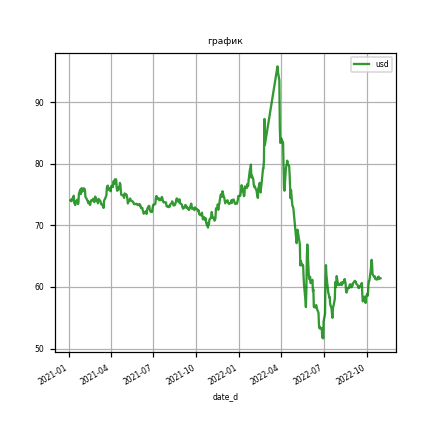

In [222]:
#figsize=(4, 4) - размер Фигуры в дюймах, x,y - данные, alpha,color - цвет и его прозрачнос, grid - сетка
figure_a = dataframe_USD.plot(figsize=(4, 4), x="date_d", y="usd", alpha=0.8, color = "green", grid = True, title = "график")

Методы для потроения графиков. Эти методы определяют тип графика: столбчатая гистограмма, круговая гистограмма и т.д.

In [189]:
list_a = [method_name for method_name in dir(dataframe_USD.plot) if method_name[0]!='_']
print(list_a)

['area', 'bar', 'barh', 'box', 'density', 'hexbin', 'hist', 'kde', 'line', 'pie', 'scatter']


<IPython.core.display.Javascript object>


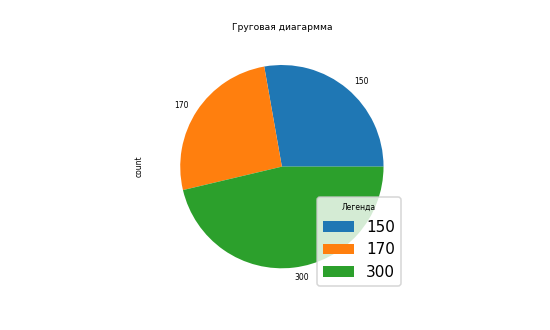

In [221]:
dataframe_a.plot(kind='pie', y = "count", labels = dataframe_a['b'], figsize=(5, 3), title = "Круговая диагармма")
# или dataframe_a.plot.pie( y = "count", labels = dataframe_a['b'], figsize=(5, 3), title = "Круговая диагармма")
# оформим легенду
plt.legend(fontsize=10, title='Легенда', loc="lower right") # параметры легенды 


Место расположения легенды определяется параметром loc:
"best", "upper right", "upper left", "lower left", "lower right","right","center left", "center right", "lower center", "upper center", "center", "upper right"

<IPython.core.display.Javascript object>


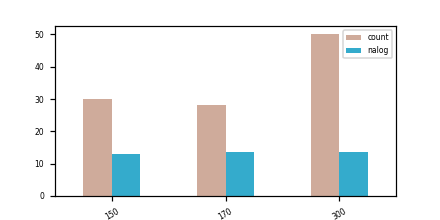

In [234]:
dataframe_a.plot.bar(y = ["count", "nalog"], x = 'b', figsize=(4, 2), color = ["#cfab9b","#34abcc"])
plt.xticks(rotation=30) # поворот подписей по оси X
plt.show()

Figure - это контейнер самого верхнего уровня, область на которой рисуются графики и не только. Таких областей может быть несколько, каждая из которых может содержать несколько контейнеров (подконтейнеров) -- Axes.
Axes (или Subplots) - это та области (подобласть Фигуры) на которых отражаются графики и вспомогательные атрибуты: линии сетки, метки и т.д.).

<IPython.core.display.Javascript object>


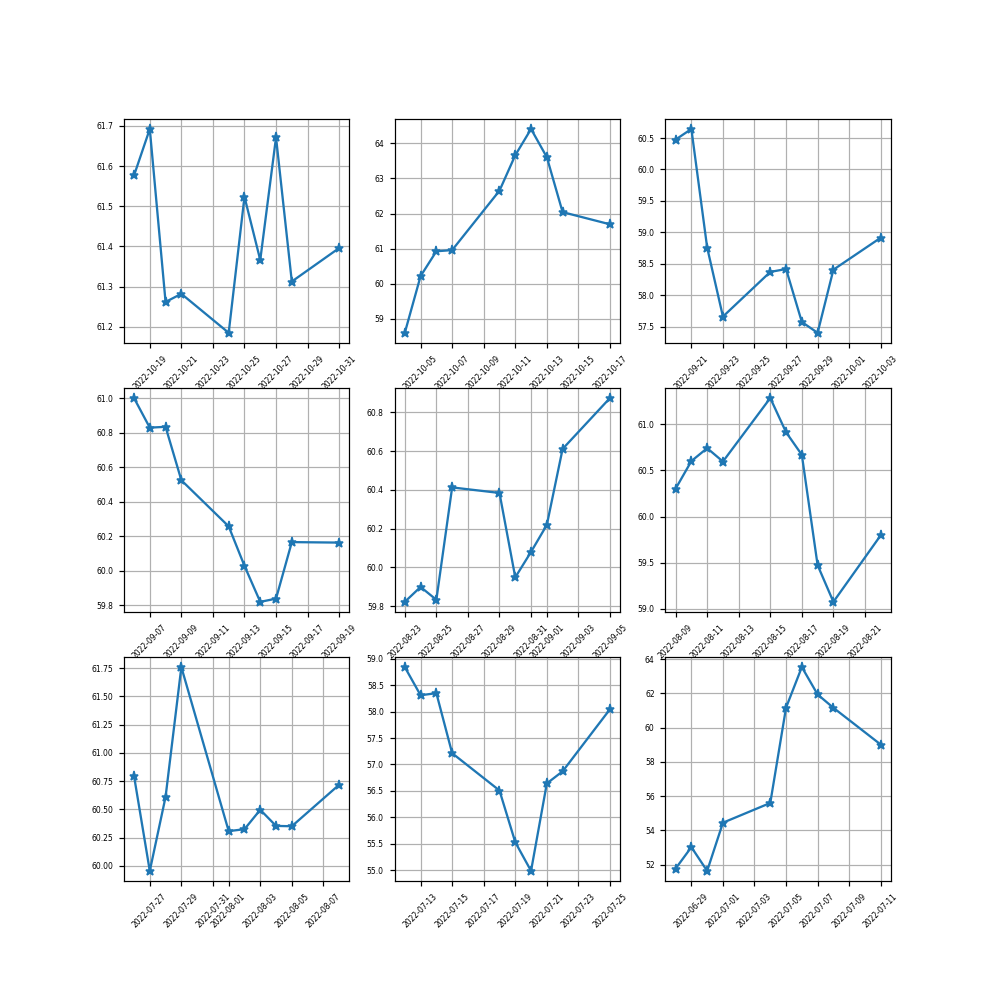

In [190]:
matplotlib.rcParams.update({'font.size': 5})
# Можно построить набор диаграмм и графиков через специальный объект Фигура и объекты Области
figure_a = plt.figure(figsize=(9,9))
# количество графиков
N = 9

# сформировали данные для графиков
data_figure, position = [], []

for i in range(N):
    data_figure.append(dataframe_USD[:][i*10: (i+1)*10]) # добавили данные для нового графика 
    position.append(figure_a.add_subplot(330 + (i+1))) # добавили область для нового графика
    position[i].plot(data_figure[i]["date_d"], data_figure[i]["usd"],'-*') # в новую область вывели график
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

### Seaborn 
Библиотека для создания статистических графиков. Это дочерняя библиотека, основанная на matplotlib. Seaborn позволяет изучать и анализорвать данные. Существенный пласт различных преобразований скрыт от пользователей, которые библиотека бурёт на себя, предоставляя пользователю возможность быстро создавать информативные графики.

In [129]:
#%pip install seaborn
import seaborn as sns #подключаем библиотеку

In [137]:
# формируем датасет с данными: IQ студентов 1 и 2 курсов трёх институтов
dataframe_c = pd.read_csv('Stud.csv', sep=";")
print(dataframe_c.shape)
dataframe_c.head(3)

(15, 4)


,stud,place,IQ,kurs
0,Ivanov,IMIT,67.45,1
1,Mironov,IMIT,89.90,2
2,Surtaev,IGN,49.69,2


In [140]:
# посмотрим сколько студентов в каждом курсе
dataframe_c.groupby(['kurs']).count()

,stud,place,IQ
kurs,,,
1,4,4,4
2,11,11,11


In [145]:
# добавим данных в датафрейм (студентов первого курса)
dataframe_temp  = dataframe_c.copy()
# заменяем в скопировнных данных kurs
dataframe_temp = dataframe_temp.replace({'kurs' : { 1 : 2, 2 : 1}}) 
dataframe_c.groupby(['kurs']).count()


,stud,place,IQ
kurs,,,
1,4,4,4
2,11,11,11


In [146]:
# добавляем измененные данные                               
dataframe_c = dataframe_c.append(dataframe_temp)
dataframe_c.reset_index(drop=True)
dataframe_c.shape

(30, 4)

<b>Cкрипичная диаграмма: violinplot()</b>

Попробуем получить визуализацию распределения данных, сегментированное по типу (в нашем случае тип определяется полем place).

Для этого следуют использовать категориальную переменную для x (дискретную) и непрерывную (числовую) для y.

<IPython.core.display.Javascript object>


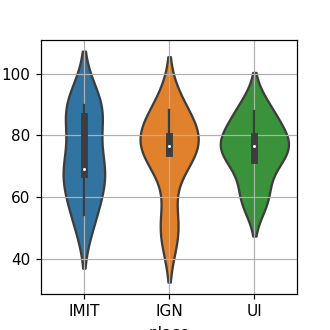

In [147]:
plt.figure(figsize=(3,3))
sns.violinplot(x="place", y="IQ", data=dataframe_c)
plt.grid(True)
plt.show()

Изменим <b>категориальную переменную</b>: сравним IQ студентов по курсам

<IPython.core.display.Javascript object>


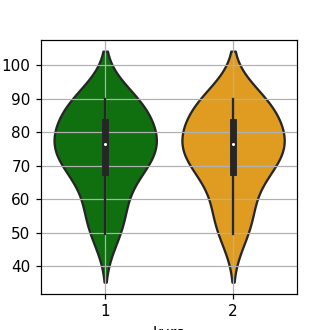

In [148]:
plt.figure(figsize=(3,3))
sns.violinplot(x="kurs", y="IQ", data=dataframe_c, palette = ['green', 'orange'])
plt.grid(True)

Воспользуемся ключом hue (оттенок), для того чтобы данные внутри категироии развить на группы (у каждой группы свой цвет)

<IPython.core.display.Javascript object>


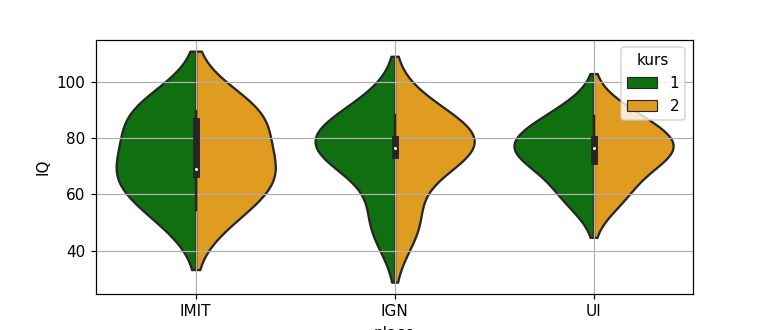

In [149]:
plt.figure(figsize=(7,3))
sns.violinplot(x="place", y="IQ", data=dataframe_c, hue="kurs", split=True, palette = ['green', 'orange'])
plt.grid(True)